For my portion of the analysis, I focused on exploring the relationship between total compensation (both tdc1 and tdc2) and tax-related metrics, including effective tax rate and deferred tax percentage. The goal was to understand how different levels of compensation impact a company's tax efficiency and tax obligations. I began by crafting and executing queries to identify companies with the highest total compensation, those with the highest effective tax rates, and those exhibiting negative or low deferred tax percentages. This allowed for a targeted exploration of companies with unique compensation structures. I then conducted exploratory data analysis and visualized the distribution of compensation and tax-related variables across different compensation brackets, using scatter plots, boxplots, and tax efficiency analyses. By examining these relationships, I aimed to uncover any significant patterns or discrepancies, and to contribute to the overall understanding of compensation and tax behavior within the dataset. These findings will support the team’s broader analysis of how compensation practices influence a company’s tax strategies.

In [ ]:
#import pandas
import pandas as pd
import numpy as np

In [ ]:
#import the merged dataset from team's GitHub
mergedData = "https://raw.githubusercontent.com/causeyca21/CSC442Group/refs/heads/main/merged_data.csv"

data = pd.read_csv(mergedData)

data

,gvkey,tic,act,at,capx,che,cogs,ib,pi,revt,...,opt_unex_unexer_est_val,othcomp,salary,stock_awards,stock_unvest_val,tdc1,tdc2,total_sec,Stock as % of total compensation,Options as % of total compensation
0,1004,AIR,1097.900,1833.100,29.500,81.800,1591.300,89.800,121.200,1990.600,...,1684.328,482.257,1050.000,3272.152,13379.485,7865.228,12846.484,7865.450,0.416028,0.737331
1,1075,PNW,1926.967,24661.153,1889.934,4.955,3077.308,501.557,595.693,4695.991,...,0.000,34.831,1125.000,5028.405,3237.829,3753.703,3753.703,9322.192,1.339585,0.000000
2,1161,AMD,16768.000,67885.000,546.000,5773.000,10833.000,854.000,508.000,22680.000,...,0.000,28.711,1200.000,21848.258,9531.088,8500.023,123065.368,30348.281,2.570376,14.165121
3,1209,APD,5200.500,32002.500,4626.400,1949.200,7474.700,2292.800,2882.400,12600.000,...,0.000,401.795,1350.000,17074.629,18076.385,9994.108,9994.108,22078.099,1.708470,0.000000
4,1230,ALK,2705.000,14613.000,1494.000,1791.000,8106.000,235.000,323.000,10426.000,...,0.000,386.446,637.692,7969.932,0.000,8570.214,8570.214,10313.054,0.929957,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,264193,SNDR,1110.900,4557.200,807.600,159.600,4668.400,238.500,306.100,5498.900,...,216.553,149.056,941.667,4703.533,268.218,1090.723,1090.723,5794.256,4.312308,0.000000
1148,264416,UCTT,893.200,1867.700,75.800,307.000,1411.100,-31.100,-11.300,1734.500,...,0.000,11.997,736.538,3507.146,2986.943,5043.765,5043.765,5043.765,0.695343,0.000000
1149,287462,FF,290.546,367.081,6.022,220.189,316.888,37.382,37.383,368.250,...,0.000,51.000,442.000,0.000,0.000,699.000,699.000,699.000,0.000000,0.000000
1150,317264,LPG,236.299,1708.914,68.785,148.797,98.309,172.444,172.444,392.151,...,0.000,9.900,650.000,2381.285,3095.991,1914.900,1914.900,4296.185,1.243556,0.000000


In [ ]:
# Selecting relevant columns for analysis
columns_of_interest = ['tdc1', 'tdc2', 'txt', 'revt', 'txc', 'pi', 'txdc', 'at',
                       'Total Income Taxes as % of pretax income',
                       'Total Income Deferred Taxes as % of pretax income',
                       'Total Income Deferred Taxes as % of total assets']

# Checking for missing values
missing_values = data[columns_of_interest].isnull().sum()
print("Missing Values in Key Variables:\n", missing_values)

Missing Values in Key Variables:
 tdc1                                                 0
tdc2                                                 0
txt                                                  0
revt                                                 0
txc                                                  0
pi                                                   0
txdc                                                 0
at                                                   0
Total Income Taxes as % of pretax income             0
Total Income Deferred Taxes as % of pretax income    0
Total Income Deferred Taxes as % of total assets     0
dtype: int64


In [ ]:
# Summary statistics
summary_stats = data[['tdc1', 'tdc2', 'Total Income Taxes as % of pretax income',
                    'Total Income Deferred Taxes as % of pretax income',
                    'Total Income Deferred Taxes as % of total assets']].describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
                 tdc1           tdc2  Total Income Taxes as % of pretax income  \
count    1152.000000    1152.000000                               1152.000000   
mean     8445.110425   11182.149141                                  0.194361   
std      8823.625910   33852.865160                                  2.284329   
min         0.000000       0.000000                                -32.937500   
25%      3394.220500    3214.197250                                  0.110772   
50%      6192.017000    6207.086000                                  0.208466   
75%     11068.594750   11803.380000                                  0.252199   
max    149429.486000  942779.918000                                 64.023569   

       Total Income Deferred Taxes as % of pretax income  \
count                                        1152.000000   
mean                                           -0.007388   
std                                             2.861176   
min     

In [ ]:
# Correlation matrix
correlation_matrix = data[['tdc1', 'tdc2', 'Total Income Taxes as % of pretax income',
                         'Total Income Deferred Taxes as % of pretax income',
                         'Total Income Deferred Taxes as % of total assets']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                                                        tdc1      tdc2  \
tdc1                                               1.000000  0.234672   
tdc2                                               0.234672  1.000000   
Total Income Taxes as % of pretax income           0.006133 -0.018041   
Total Income Deferred Taxes as % of pretax income -0.017832 -0.017925   
Total Income Deferred Taxes as % of total assets  -0.022141 -0.144829   

                                                   Total Income Taxes as % of pretax income  \
tdc1                                                                               0.006133   
tdc2                                                                              -0.018041   
Total Income Taxes as % of pretax income                                           1.000000   
Total Income Deferred Taxes as % of pretax income                                 -0.607240   
Total Income Deferred Taxes as % of total assets                

# Combined Key Insights from Summary Statistics and Correlation Matrix:
## Total Compensation (tdc1 and tdc2):

*   Both tdc1 and tdc2 show significant variation with large outliers, especially with extremely high compensation values (up to ~$942,779). The presence of zero values in both suggests potential missing compensation for some executives.
*   Correlation: A moderate positive correlation (0.23) exists between tdc1 and tdc2, indicating that higher total compensation (tdc2) is somewhat associated with higher total compensation (tdc1).

## Income Taxes as % of Pretax Income:



*   The average tax burden is 19.4%, but there is substantial variation in this metric, with some companies having negative values (as low as -32.94%), likely due to tax refunds or adjustments.
*   Correlation: There is no strong correlation with total compensation variables (tdc1 and tdc2), indicating that compensation isn't directly influencing tax rates.

## Deferred Taxes:

*   Deferred taxes as % of pretax income is generally low (mean: -0.74%), with a high variation (Std: 2.86), showing both liabilities and assets for tax deferrals. Extreme values range from -38.21% to 72.06%. Deferred taxes as % of total assets shows similarly high variability, indicating that some companies have more significant tax deferrals than others (ranging from -39.78% to 26.6%).
*   Correlation: Both tax deferral variables show weak correlations with total compensation, suggesting that deferred tax strategies don't strongly align with executive pay packages.


## Tax and Compensation Relationships:

*   The weak correlations between total compensation (tdc1, tdc2) and tax-related metrics (Income Taxes as % of pretax income, Deferred Taxes) suggest that executive compensation is not closely linked to tax burden or deferral strategies at a general level. However, outliers (especially in deferred taxes and compensation) may influence this trend.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

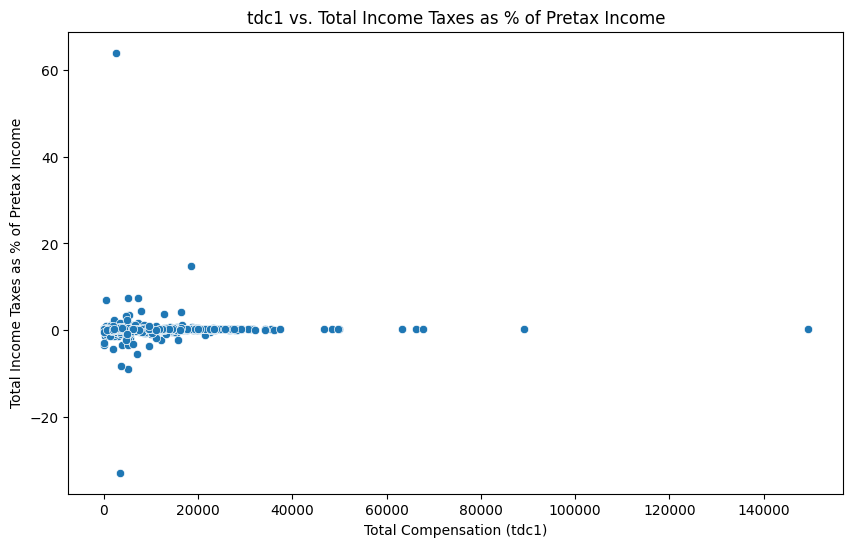

In [ ]:
# Scatter plot for tdc1 vs. Total Income Taxes as % of pretax income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tdc1', y='Total Income Taxes as % of pretax income')
plt.title('tdc1 vs. Total Income Taxes as % of Pretax Income')
plt.xlabel('Total Compensation (tdc1)')
plt.ylabel('Total Income Taxes as % of Pretax Income')
plt.show()

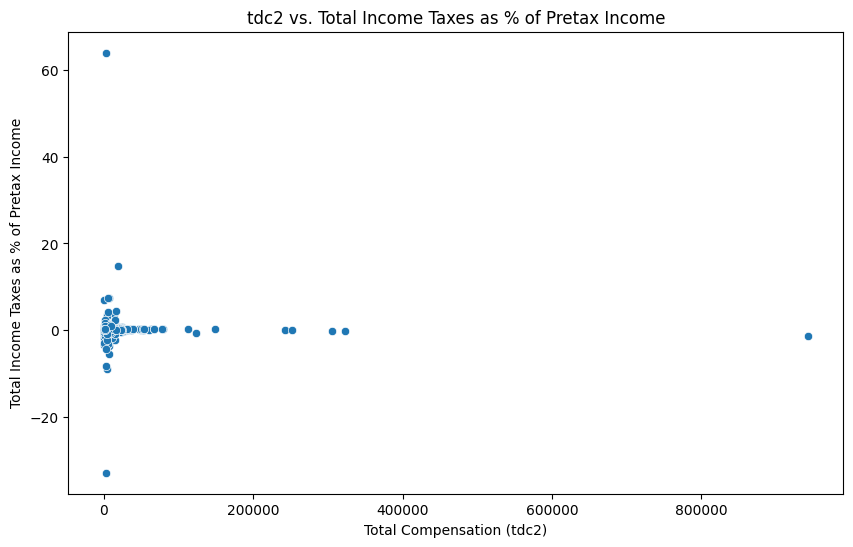

In [ ]:
# Scatter plot for tdc2 vs. Total Income Taxes as % of pretax income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tdc2', y='Total Income Taxes as % of pretax income')
plt.title('tdc2 vs. Total Income Taxes as % of Pretax Income')
plt.xlabel('Total Compensation (tdc2)')
plt.ylabel('Total Income Taxes as % of Pretax Income')
plt.show()

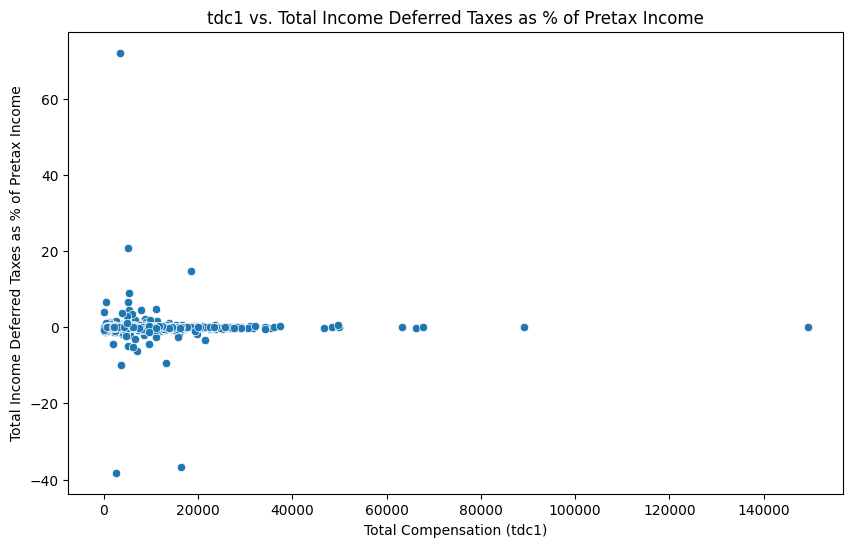

In [ ]:
# Scatter plot for tdc1 vs. Total Income Deferred Taxes as % of pretax income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tdc1', y='Total Income Deferred Taxes as % of pretax income')
plt.title('tdc1 vs. Total Income Deferred Taxes as % of Pretax Income')
plt.xlabel('Total Compensation (tdc1)')
plt.ylabel('Total Income Deferred Taxes as % of Pretax Income')
plt.show()

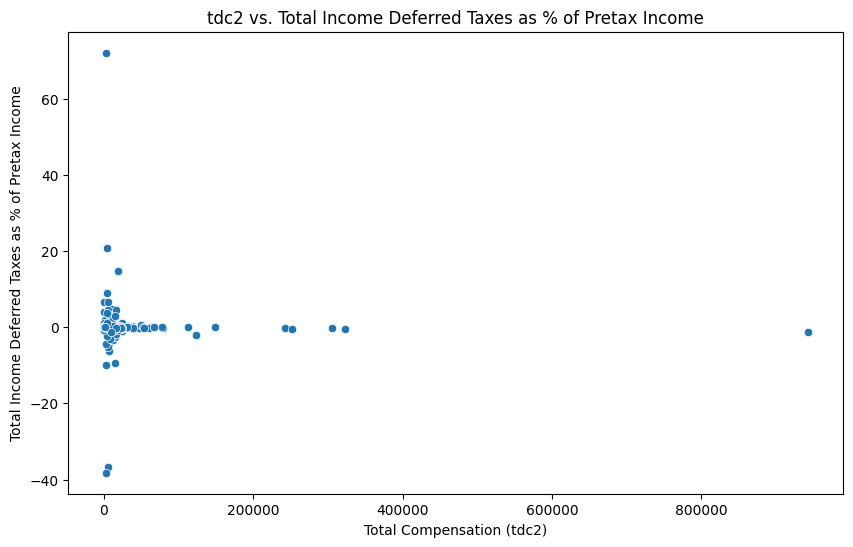

In [ ]:
# Scatter plot for tdc2 vs. Total Income Deferred Taxes as % of pretax income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tdc2', y='Total Income Deferred Taxes as % of pretax income')
plt.title('tdc2 vs. Total Income Deferred Taxes as % of Pretax Income')
plt.xlabel('Total Compensation (tdc2)')
plt.ylabel('Total Income Deferred Taxes as % of Pretax Income')
plt.show()

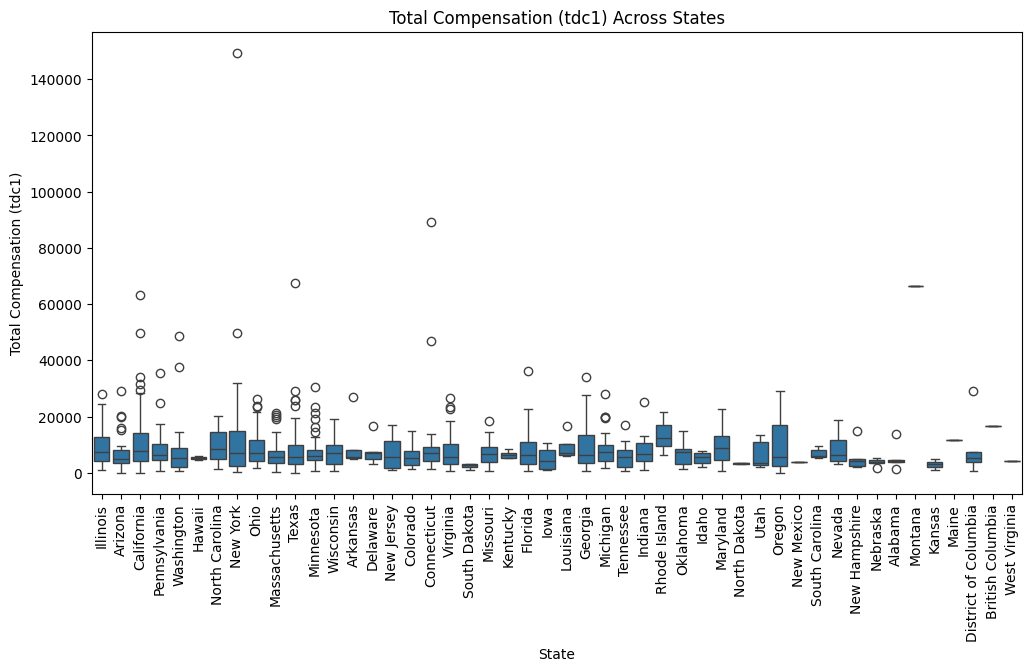

In [ ]:
# Boxplot comparing total compensation (tdc1) across different states (or industries)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='state', y='tdc1')
plt.title('Total Compensation (tdc1) Across States')
plt.xlabel('State')
plt.ylabel('Total Compensation (tdc1)')
plt.xticks(rotation=90)
plt.show()

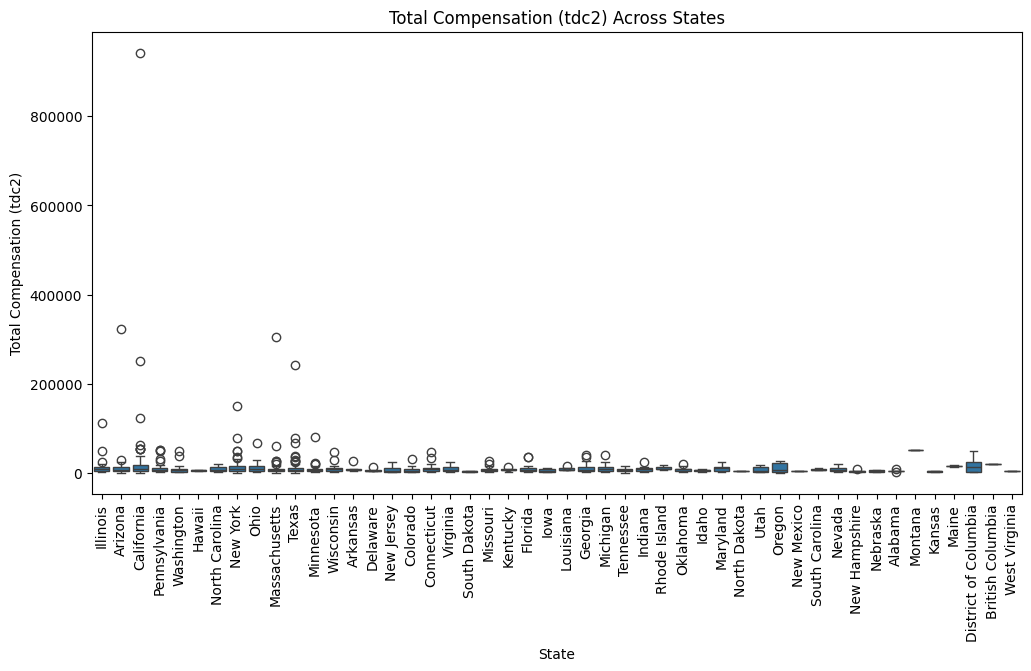

In [ ]:
# Boxplot comparing total compensation (tdc2) across different states (or industries)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='state', y='tdc2')
plt.title('Total Compensation (tdc2) Across States')
plt.xlabel('State')
plt.ylabel('Total Compensation (tdc2)')
plt.xticks(rotation=90)
plt.show()

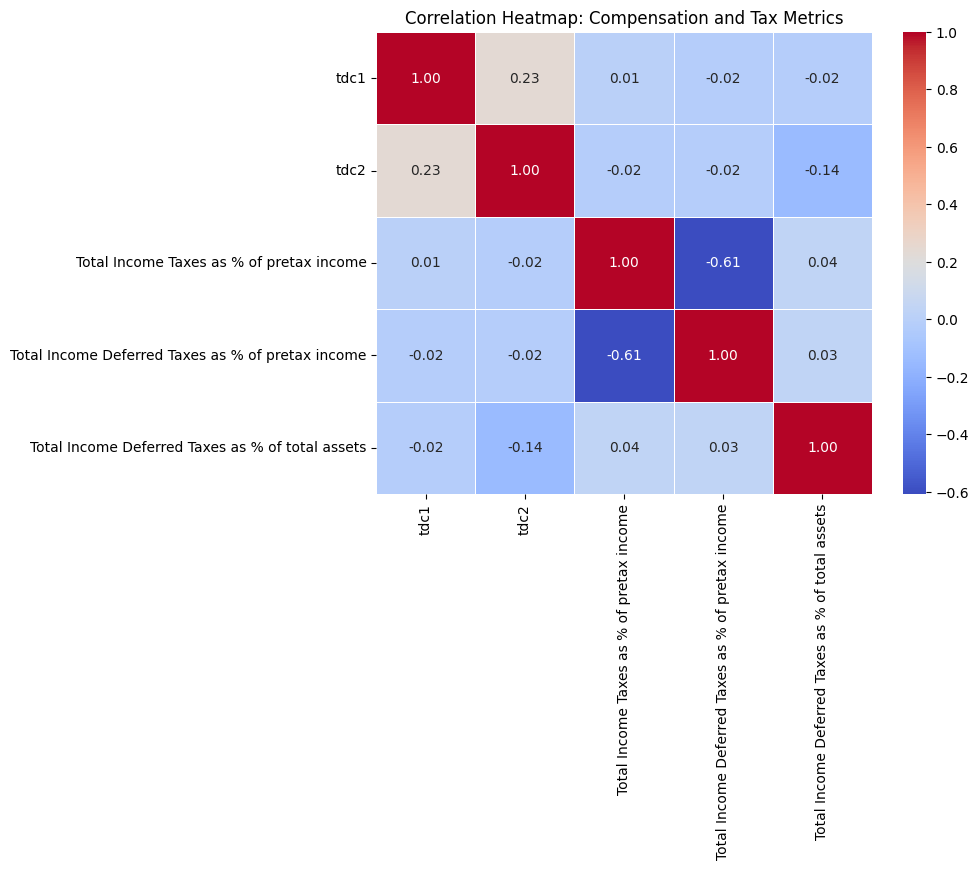

In [ ]:
# Correlation matrix for heatmap
corr_matrix = data[['tdc1', 'tdc2',
                           'Total Income Taxes as % of pretax income',
                           'Total Income Deferred Taxes as % of pretax income',
                           'Total Income Deferred Taxes as % of total assets']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Compensation and Tax Metrics')
plt.show()

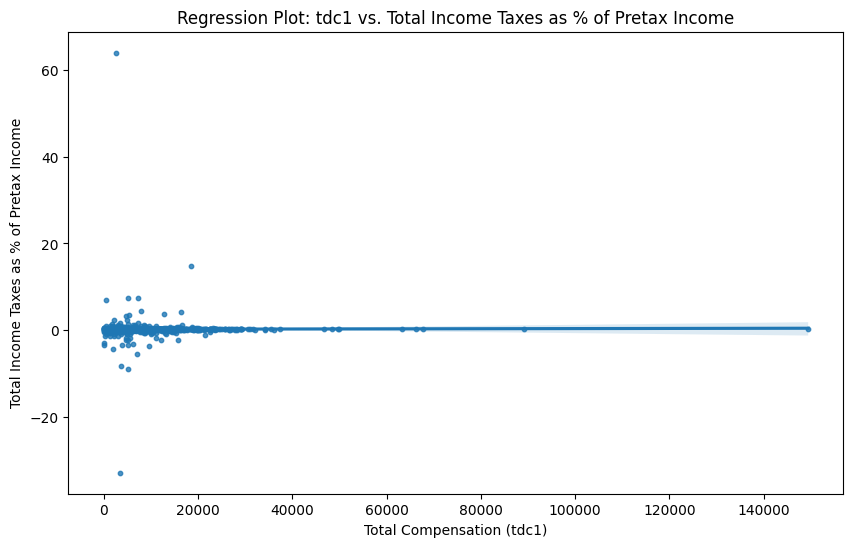

In [ ]:
# Regression plot for tdc1 vs. Total Income Taxes as % of pretax income
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='tdc1', y='Total Income Taxes as % of pretax income', scatter_kws={'s':10})
plt.title('Regression Plot: tdc1 vs. Total Income Taxes as % of Pretax Income')
plt.xlabel('Total Compensation (tdc1)')
plt.ylabel('Total Income Taxes as % of Pretax Income')
plt.show()

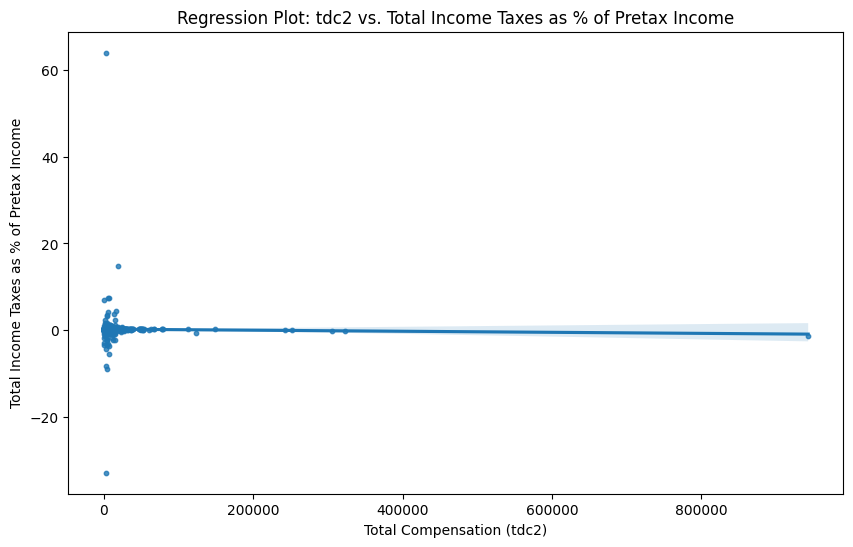

In [ ]:
# Regression plot for tdc2 vs. Total Income Taxes as % of pretax income
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='tdc2', y='Total Income Taxes as % of pretax income', scatter_kws={'s':10})
plt.title('Regression Plot: tdc2 vs. Total Income Taxes as % of Pretax Income')
plt.xlabel('Total Compensation (tdc2)')
plt.ylabel('Total Income Taxes as % of Pretax Income')
plt.show()

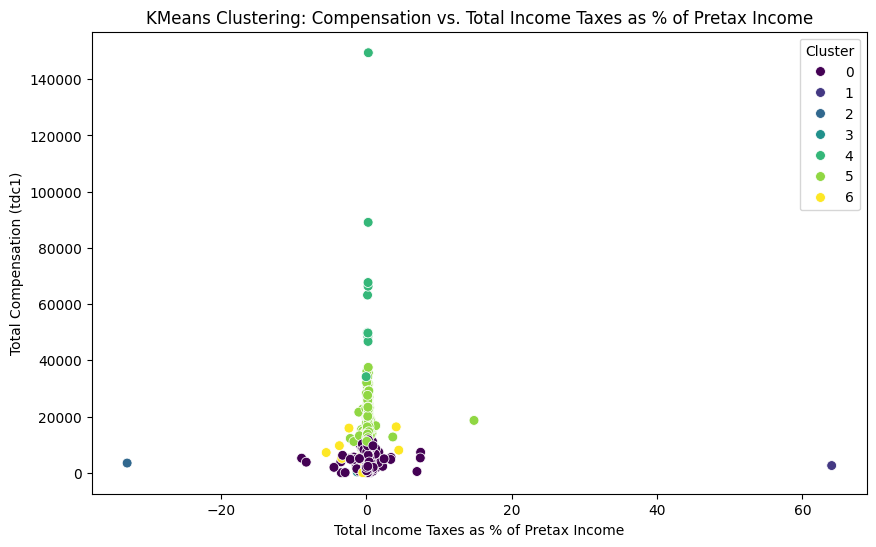

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = data[['tdc1', 'tdc2',
                        'Total Income Taxes as % of pretax income',
                        'Total Income Deferred Taxes as % of pretax income',
                        'Total Income Deferred Taxes as % of total assets']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit KMeans clustering (choose a number of clusters, e.g., 3)
kmeans = KMeans(n_clusters=7, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize KMeans clustering with tax and compensation metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data,
                x='Total Income Taxes as % of pretax income',  # X-axis: Tax metric
                y='tdc1',  # Y-axis: Total Compensation (tdc1)
                hue='Cluster', palette='viridis', s=50)
plt.title('KMeans Clustering: Compensation vs. Total Income Taxes as % of Pretax Income')
plt.xlabel('Total Income Taxes as % of Pretax Income')
plt.ylabel('Total Compensation (tdc1)')
plt.show()


In [ ]:
# Defining the compensation brackets (for tdc1 and tdc2)
bins_tdc1 = [0, 3394.22, 6192.02, 11068.59, 149429.49]
labels_tdc1 = ['Low', 'Medium-Low', 'Medium-High', 'High']

bins_tdc2 = [0, 3214.20, 6207.09, 11803.38, 942779.92]
labels_tdc2 = ['Low', 'Medium-Low', 'Medium-High', 'High']

# Assign the brackets to the data
data['tdc1_bracket'] = pd.cut(data['tdc1'], bins=bins_tdc1, labels=labels_tdc1, right=False)
data['tdc2_bracket'] = pd.cut(data['tdc2'], bins=bins_tdc2, labels=labels_tdc2, right=False)

# Show the results
data[['tdc1', 'tdc1_bracket', 'tdc2', 'tdc2_bracket']].head()

,tdc1,tdc1_bracket,tdc2,tdc2_bracket
0,7865.228,Medium-High,12846.484,High
1,3753.703,Medium-Low,3753.703,Medium-Low
2,8500.023,Medium-High,123065.368,High
3,9994.108,Medium-High,9994.108,Medium-High
4,8570.214,Medium-High,8570.214,Medium-High


In [ ]:
#Group by total compensation brackets and calculate mean for tax-related variables
grouped = data.groupby('tdc1_bracket')[['Total Income Taxes as % of pretax income',
                                      'Total Income Deferred Taxes as % of pretax income',
                                      'Total Income Deferred Taxes as % of total assets']].mean()


<ipython-input-24-043a42e0e165>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('tdc1_bracket')[['Total Income Taxes as % of pretax income',


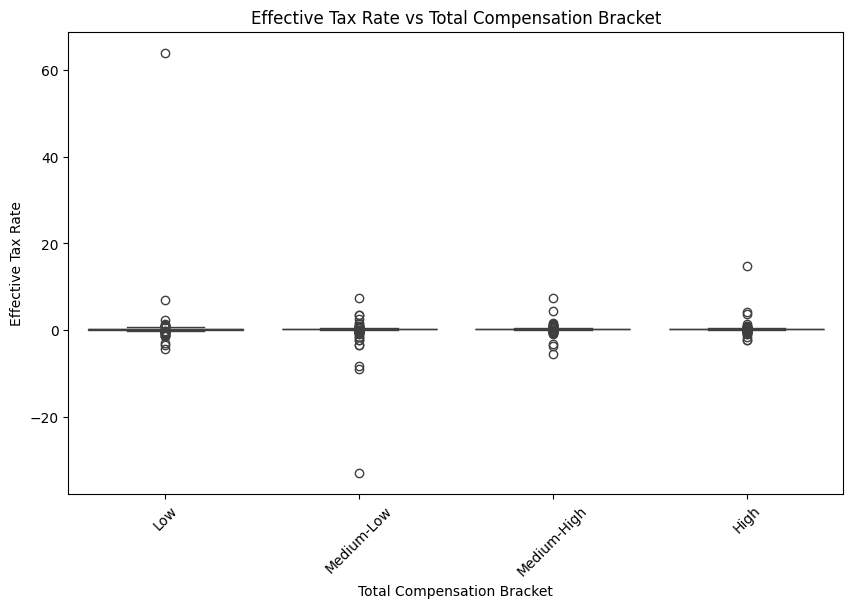

In [ ]:
# Boxplot for Effective Tax Rate vs Compensation Brackets
plt.figure(figsize=(10,6))
sns.boxplot(x='tdc1_bracket', y='Total Income Taxes as % of pretax income', data=data)
plt.title('Effective Tax Rate vs Total Compensation Bracket')
plt.xlabel('Total Compensation Bracket')
plt.ylabel('Effective Tax Rate')
plt.xticks(rotation=45)
plt.show()

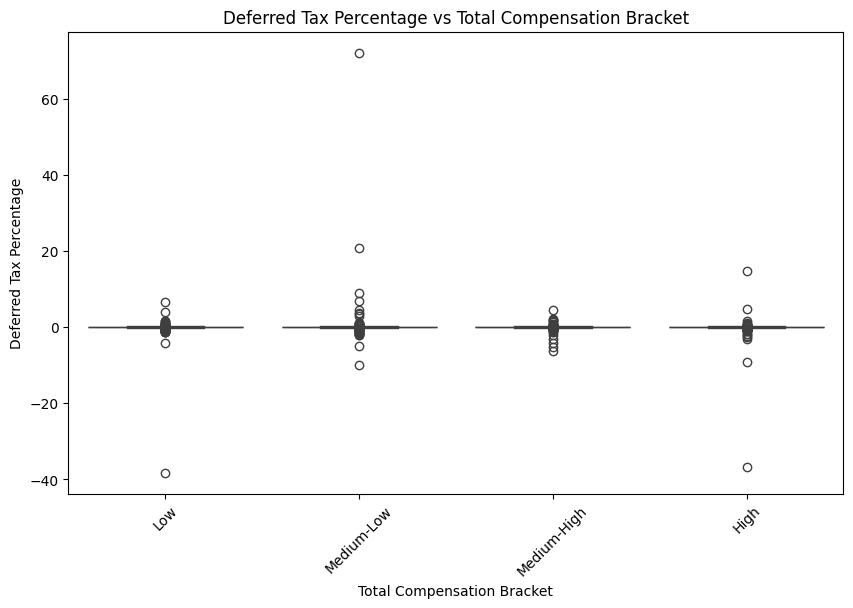

In [ ]:
# Boxplot for Deferred Tax Percentage vs Compensation Brackets
plt.figure(figsize=(10,6))
sns.boxplot(x='tdc1_bracket', y='Total Income Deferred Taxes as % of pretax income', data=data)
plt.title('Deferred Tax Percentage vs Total Compensation Bracket')
plt.xlabel('Total Compensation Bracket')
plt.ylabel('Deferred Tax Percentage')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Display grouped statistics
print(grouped)

              Total Income Taxes as % of pretax income  \
tdc1_bracket                                             
Low                                           0.354857   
Medium-Low                                    0.006776   
Medium-High                                   0.175597   
High                                          0.240214   

              Total Income Deferred Taxes as % of pretax income  \
tdc1_bracket                                                      
Low                                                   -0.129867   
Medium-Low                                             0.326493   
Medium-High                                           -0.055931   
High                                                  -0.170249   

              Total Income Deferred Taxes as % of total assets  
tdc1_bracket                                                    
Low                                                  -0.003865  
Medium-Low                                           

In [ ]:
# Top 10 companies with the highest total compensation (tdc1 and tdc2)
top_10_tdc1 = data.nlargest(10, 'tdc1')[['gvkey', 'tic', 'tdc1', 'Total Income Taxes as % of pretax income', 'Total Income Deferred Taxes as % of pretax income']]
top_10_tdc2 = data.nlargest(10, 'tdc2')[['gvkey', 'tic', 'tdc2', 'Total Income Taxes as % of pretax income', 'Total Income Deferred Taxes as % of pretax income']]

print("\nTop 10 Companies with Highest tdc1 Total Compensation:")
print(top_10_tdc1)

print("\nTop 10 Companies with Highest tdc2 Total Compensation:")
print(top_10_tdc2)



Top 10 Companies with Highest tdc1 Total Compensation:
       gvkey   tic        tdc1  Total Income Taxes as % of pretax income  \
370    12151  COTY  149429.486                                  0.257662   
919   126136  CHTR   89077.078                                  0.232419   
413    14359   PXD   67671.821                                  0.216584   
406    13824  FICO   66349.962                                  0.224428   
17      1690  AAPL   63209.845                                  0.147192   
971   147579  NFLX   49834.936                                  0.128503   
1027  164296   WBD   49702.546                                  0.202951   
368    12141  MSFT   48512.537                                  0.189786   
900   119314  BKNG   46720.734                                  0.217479   
447    17874  TMUS   37488.850                                  0.243840   

      Total Income Deferred Taxes as % of pretax income  
370                                            0.

In [ ]:
# Companies with the highest effective tax rates (Top 10 by Total Income Taxes as % of Pretax Income)
top_10_tax_rate = data.nlargest(10, 'Total Income Taxes as % of pretax income')[['gvkey', 'tic', 'Total Income Taxes as % of pretax income', 'tdc1', 'tdc2']]
print("Top 10 Companies with the Highest Effective Tax Rates:")
print(top_10_tax_rate)

Top 10 Companies with the Highest Effective Tax Rates:
       gvkey   tic  Total Income Taxes as % of pretax income       tdc1  \
939   139804  TTMI                                 64.023569   2554.410   
497    21808   CZR                                 14.800000  18610.359   
826    63527  SRCL                                  7.454545   7290.832   
1028  164363  TROX                                  7.408163   5254.719   
500    22082  JYNT                                  6.949969    434.285   
887   111534  MSTR                                  4.446063   8028.255   
781    43026  FTRE                                  4.090909  16320.393   
538    24216   AES                                  3.625000  12716.194   
211     7275  MLAB                                  3.390746   5435.566   
702    33767  SONO                                  3.338188   4728.927   

           tdc2  
939    2554.410  
497   18610.359  
826    7290.832  
1028   5254.719  
500     434.285  
887   16926

In [ ]:
# Companies with negative or low deferred tax percentages (both in terms of pretax income and total assets)
low_deferred_tax = data[(data['Total Income Deferred Taxes as % of pretax income'] < 0) | (data['Total Income Deferred Taxes as % of total assets'] < 0)]

# Show the companies with negative deferred tax percentages
print("Companies with Negative or Low Deferred Tax Percentages:")
print(low_deferred_tax[['gvkey', 'tic', 'Total Income Deferred Taxes as % of pretax income', 'Total Income Deferred Taxes as % of total assets', 'tdc1', 'tdc2']])


Companies with Negative or Low Deferred Tax Percentages:
       gvkey   tic  Total Income Deferred Taxes as % of pretax income  \
0       1004   AIR                                          -0.018152   
2       1161   AMD                                          -2.005906   
3       1209   APD                                          -0.008569   
7       1327  SWKS                                          -0.140156   
8       1410   ABM                                          -0.014799   
...      ...   ...                                                ...   
1142  192255  ACHC                                           3.705994   
1144  196268  YELP                                          -0.210788   
1145  199356  TRIP                                          -0.200000   
1146  260893  BLKB                                          -1.381093   
1148  264416  UCTT                                           1.097345   

      Total Income Deferred Taxes as % of total assets       tdc1 

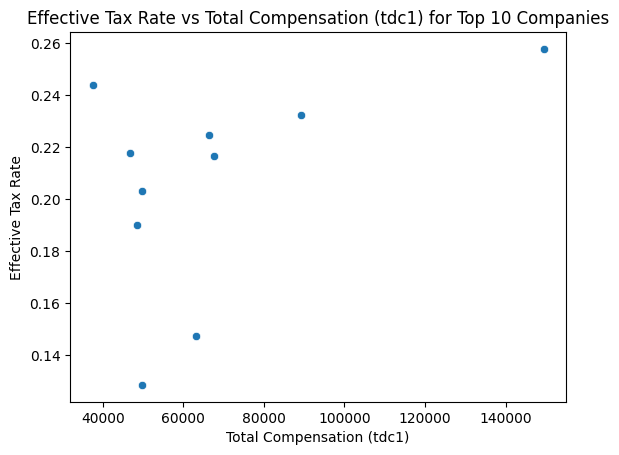

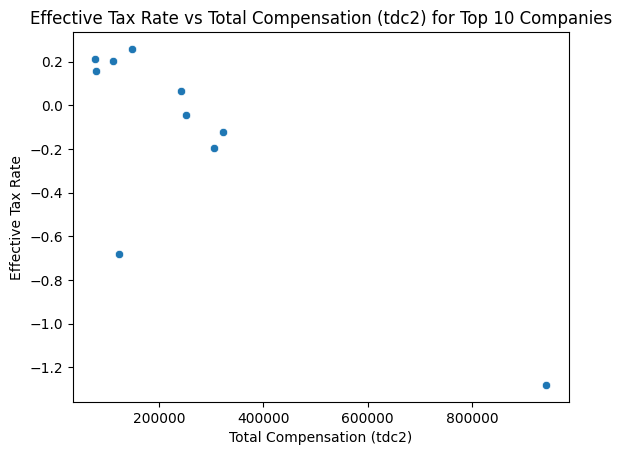

In [ ]:
# For tdc1
sns.scatterplot(x=top_10_tdc1['tdc1'], y=top_10_tdc1['Total Income Taxes as % of pretax income'])
plt.title('Effective Tax Rate vs Total Compensation (tdc1) for Top 10 Companies')
plt.xlabel('Total Compensation (tdc1)')
plt.ylabel('Effective Tax Rate')
plt.show()

# For tdc2
sns.scatterplot(x=top_10_tdc2['tdc2'], y=top_10_tdc2['Total Income Taxes as % of pretax income'])
plt.title('Effective Tax Rate vs Total Compensation (tdc2) for Top 10 Companies')
plt.xlabel('Total Compensation (tdc2)')
plt.ylabel('Effective Tax Rate')
plt.show()

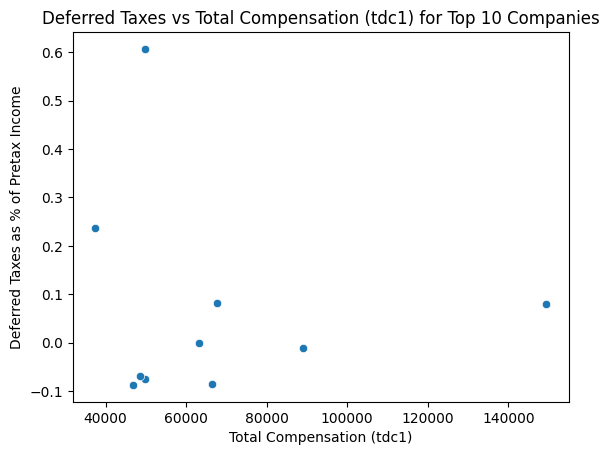

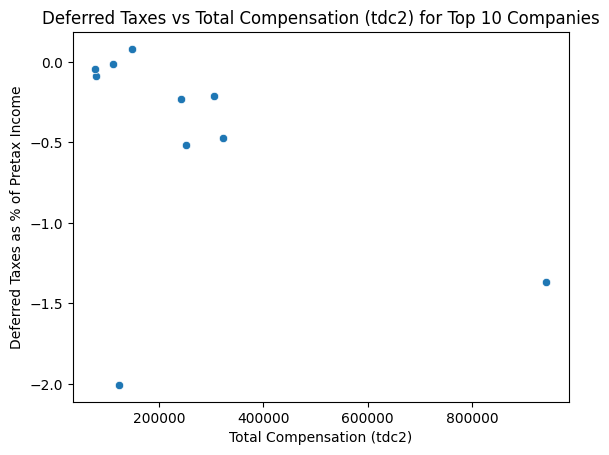

In [ ]:
# For deferred tax percentage vs tdc1
sns.scatterplot(x=top_10_tdc1['tdc1'], y=top_10_tdc1['Total Income Deferred Taxes as % of pretax income'])
plt.title('Deferred Taxes vs Total Compensation (tdc1) for Top 10 Companies')
plt.xlabel('Total Compensation (tdc1)')
plt.ylabel('Deferred Taxes as % of Pretax Income')
plt.show()

# For deferred tax percentage vs tdc2
sns.scatterplot(x=top_10_tdc2['tdc2'], y=top_10_tdc2['Total Income Deferred Taxes as % of pretax income'])
plt.title('Deferred Taxes vs Total Compensation (tdc2) for Top 10 Companies')
plt.xlabel('Total Compensation (tdc2)')
plt.ylabel('Deferred Taxes as % of Pretax Income')
plt.show()


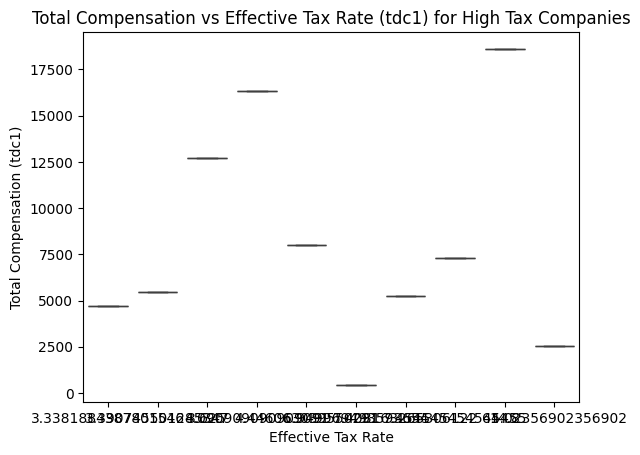

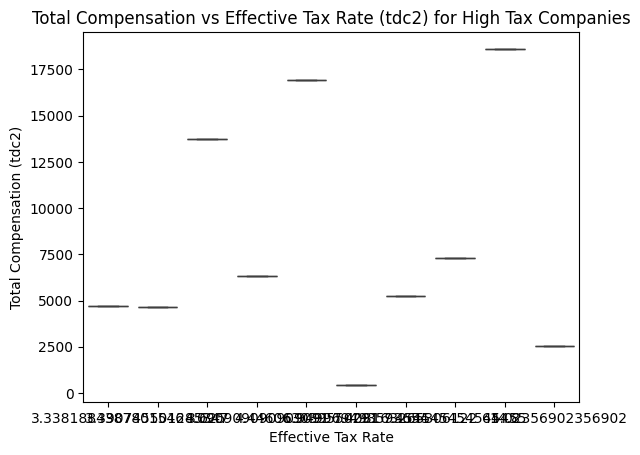

In [ ]:
sns.boxplot(x=top_10_tax_rate['Total Income Taxes as % of pretax income'], y=top_10_tax_rate['tdc1'])
plt.title('Total Compensation vs Effective Tax Rate (tdc1) for High Tax Companies')
plt.xlabel('Effective Tax Rate')
plt.ylabel('Total Compensation (tdc1)')
plt.show()

sns.boxplot(x=top_10_tax_rate['Total Income Taxes as % of pretax income'], y=top_10_tax_rate['tdc2'])
plt.title('Total Compensation vs Effective Tax Rate (tdc2) for High Tax Companies')
plt.xlabel('Effective Tax Rate')
plt.ylabel('Total Compensation (tdc2)')
plt.show()


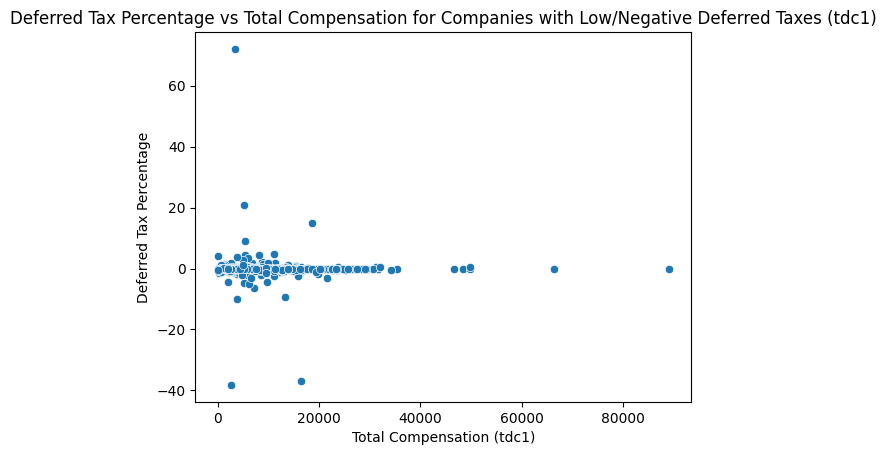

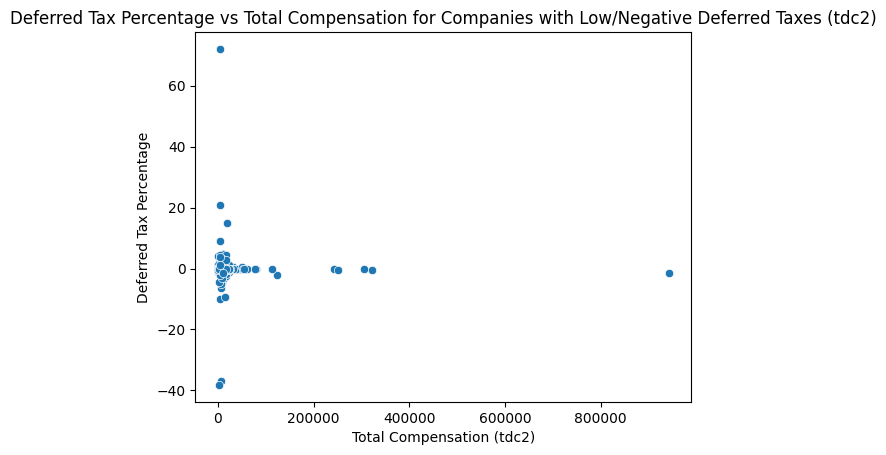

In [ ]:
sns.scatterplot(x=low_deferred_tax['tdc1'], y=low_deferred_tax['Total Income Deferred Taxes as % of pretax income'])
plt.title('Deferred Tax Percentage vs Total Compensation for Companies with Low/Negative Deferred Taxes (tdc1)')
plt.xlabel('Total Compensation (tdc1)')
plt.ylabel('Deferred Tax Percentage')
plt.show()

sns.scatterplot(x=low_deferred_tax['tdc2'], y=low_deferred_tax['Total Income Deferred Taxes as % of pretax income'])
plt.title('Deferred Tax Percentage vs Total Compensation for Companies with Low/Negative Deferred Taxes (tdc2)')
plt.xlabel('Total Compensation (tdc2)')
plt.ylabel('Deferred Tax Percentage')
plt.show()


In [ ]:
import statsmodels.api as sm

# Regression model: Total Compensation vs Effective Tax Rate (tdc1)
X = sm.add_constant(data['tdc1'])  # Adding a constant for the intercept
y = data['Total Income Taxes as % of pretax income']
model = sm.OLS(y, X).fit()
print(model.summary())



                                       OLS Regression Results                                       
Dep. Variable:     Total Income Taxes as % of pretax income   R-squared:                       0.000
Model:                                                  OLS   Adj. R-squared:                 -0.001
Method:                                       Least Squares   F-statistic:                   0.04325
Date:                                      Mon, 31 Mar 2025   Prob (F-statistic):              0.835
Time:                                              22:40:26   Log-Likelihood:                -2585.7
No. Observations:                                      1152   AIC:                             5175.
Df Residuals:                                          1150   BIC:                             5186.
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

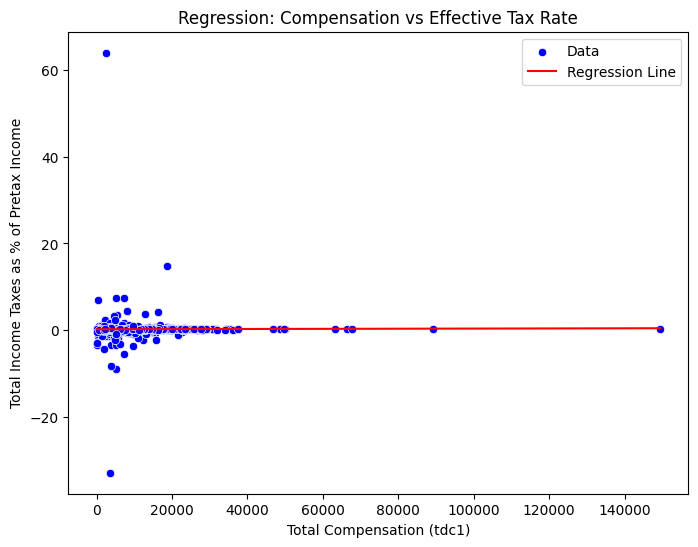

In [ ]:
# Fit the model
model = sm.OLS(y, X).fit()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['tdc1'], y=y, label="Data", color="blue")

# Regression line
x_range = np.linspace(data['tdc1'].min(), data['tdc1'].max(), 100)
X_pred = sm.add_constant(x_range)  # Add constant for intercept
y_pred = model.predict(X_pred)

plt.plot(x_range, y_pred, color='red', label="Regression Line")

# Labels and title
plt.xlabel("Total Compensation (tdc1)")
plt.ylabel("Total Income Taxes as % of Pretax Income")
plt.title("Regression: Compensation vs Effective Tax Rate")
plt.legend()
plt.show()